In [ ]:
!pip install sklearn-som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import davies_bouldin_score
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn_som.som import SOM

## Generate Datasets

In [ ]:
data_1, data_y_1 = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=100)

In [ ]:
data_2, data_y_2 = make_classification(n_samples=350, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=100)

In [ ]:
data_3, data_y_3 = make_classification(n_samples=400, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=100)

## Visualisation

## 1

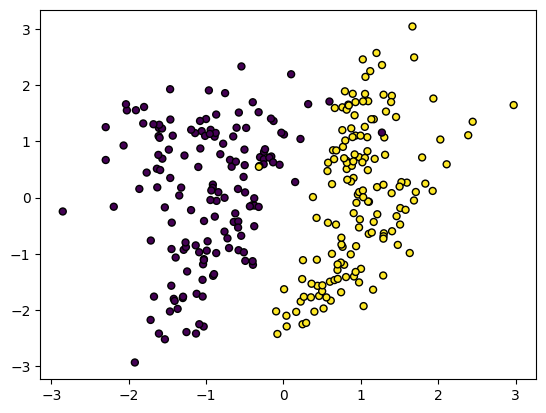

In [ ]:
plt.scatter(data_1[:, 0], data_1[:, 1], marker="o", c=data_y_1, s=25, edgecolor="k")
plt.show()

## 2

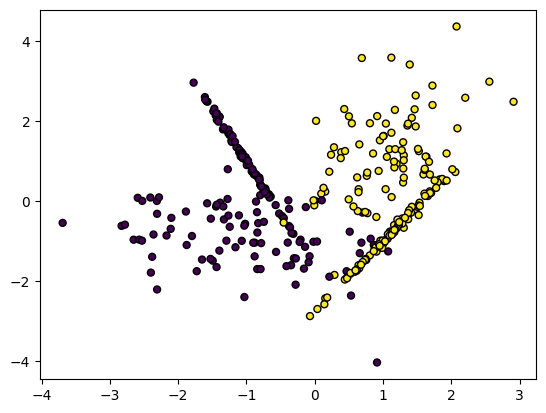

In [ ]:
plt.scatter(data_2[:, 0], data_2[:, 1], marker="o", c=data_y_2, s=25, edgecolor="k")
plt.show()

## 3

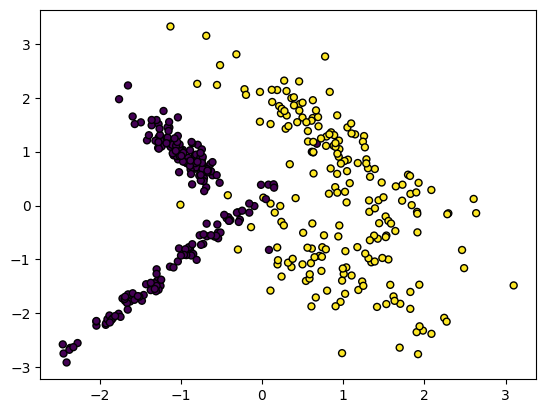

In [ ]:
plt.scatter(data_3[:, 0], data_3[:, 1], marker="o", c=data_y_3, s=25, edgecolor="k")
plt.show()

## KMeans

## 1

### Search optimal number of clusters

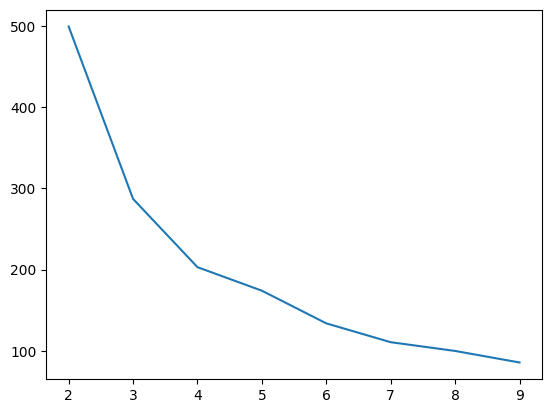

In [ ]:
inertias = []

for k in range(2, 10):
    inertias.append(KMeans(k, n_init='auto').fit(data_1).inertia_)

plt.plot(range(2,10), inertias)

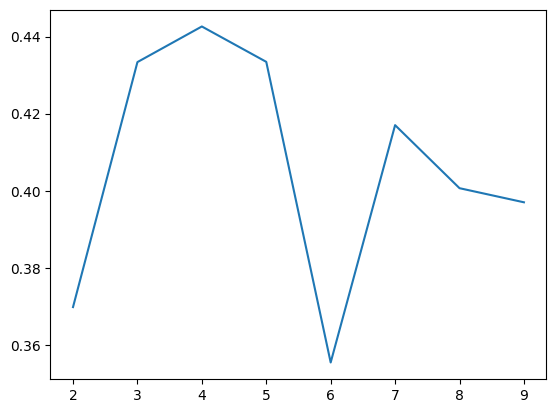

In [ ]:
ss = []

for i in range(2, 10):
    ss.append(silhouette_score(data_1, KMeans(i, n_init='auto').fit(data_1).labels_))

plt.plot(range(2,10), ss)

### FIT

In [ ]:
kmeans_1 = KMeans(3, n_init='auto').fit(data_1)

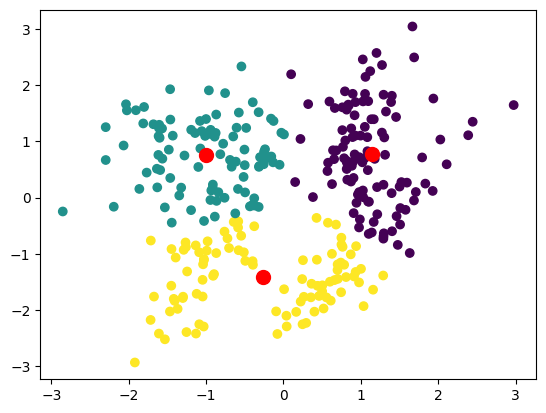

In [ ]:
plt.scatter(data_1[:,0], data_1[:,1], c=kmeans_1.labels_)
plt.scatter(kmeans_1.cluster_centers_[:,0], kmeans_1.cluster_centers_[:,1], s=100, c='red')

### Metrics

### external

In [ ]:
print(rand_score(kmeans_1.labels_, data_y_1))
print(jaccard_score(kmeans_1.labels_, data_y_1, average="micro"))

0.6974581939799331
0.011804384485666104


### internal

In [ ]:
print(silhouette_score(data_1, kmeans_1.labels_))
print(davies_bouldin_score(data_1,  kmeans_1.labels_))

0.4330469216270213
0.7906756802869733


## 2

### Search optimal number of clusters

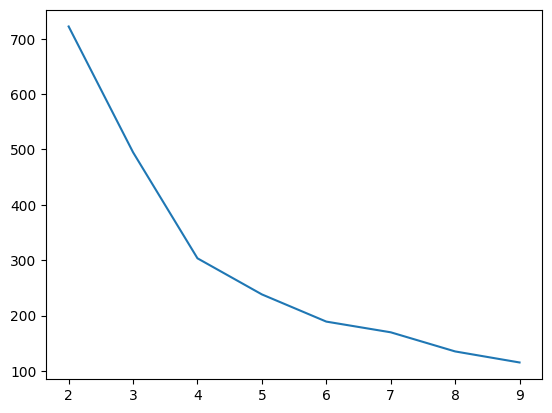

In [ ]:
inertias = []

for k in range(2, 10):
    inertias.append(KMeans(k, n_init='auto').fit(data_2).inertia_)

plt.plot(range(2,10), inertias)

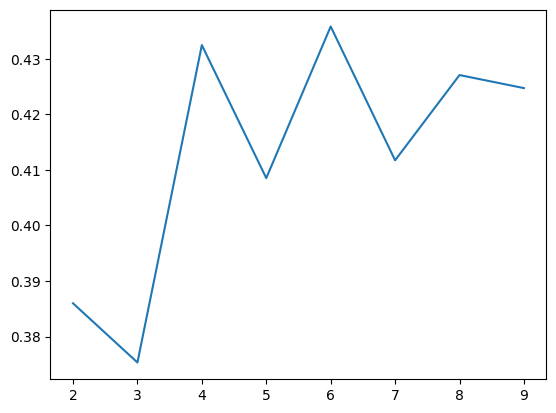

In [ ]:
ss = []

for i in range(2, 10):
    ss.append(silhouette_score(data_2, KMeans(i, n_init='auto').fit(data_2).labels_))

plt.plot(range(2,10), ss)

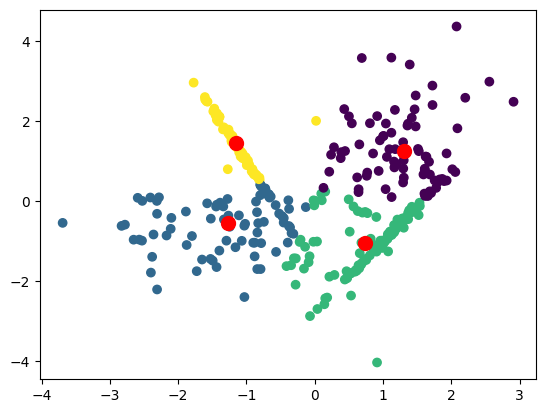

In [ ]:
kmeans_2 = KMeans(4, n_init='auto').fit(data_2)
plt.scatter(data_2[:,0], data_2[:,1], c=kmeans_2.labels_)
plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], s=100, c='red')

### Metrics


### external

In [ ]:
print(rand_score(kmeans_2.labels_, data_y_2))
print(jaccard_score(kmeans_2.labels_, data_y_2, average="micro"))

0.680196479738027
0.001430615164520744


### internal

In [ ]:
print(silhouette_score(data_2, kmeans_2.labels_))
print(davies_bouldin_score(data_2,  kmeans_2.labels_))

0.432463619457669
0.7677026287723576


## 3

### Search optimal number of clusters


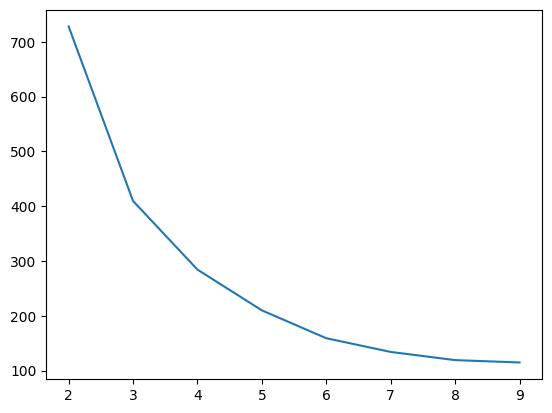

In [ ]:
inertias = []

for k in range(2, 10):
    inertias.append(KMeans(k, n_init='auto').fit(data_3).inertia_)

plt.plot(range(2,10), inertias)

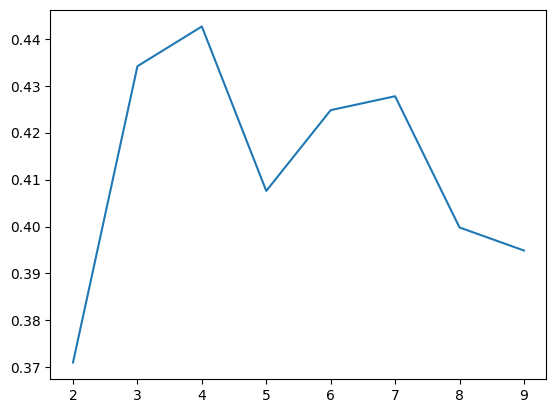

In [ ]:
ss = []

for i in range(2, 10):
    ss.append(silhouette_score(data_1, KMeans(i, n_init='auto').fit(data_1).labels_))

plt.plot(range(2,10), ss)

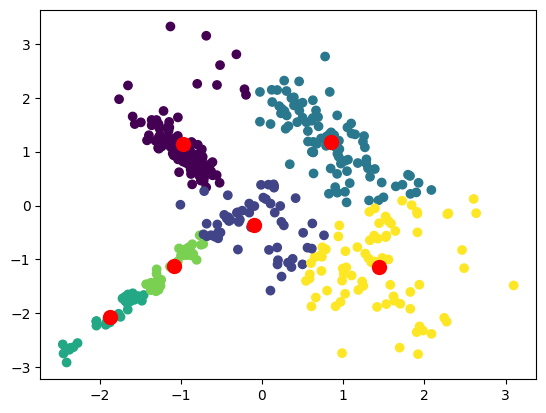

In [ ]:
kmeans_3 = KMeans(6, n_init='auto').fit(data_3)
plt.scatter(data_3[:,0], data_3[:,1], c=kmeans_3.labels_)
plt.scatter(kmeans_3.cluster_centers_[:,0], kmeans_3.cluster_centers_[:,1], s=100, c='red')

### Metrics

### external

In [ ]:
print(rand_score(kmeans_3.labels_, data_y_3))
print(jaccard_score(kmeans_3.labels_, data_y_3, average="micro"))

0.6501127819548872
0.18168389955686853


### internal

In [ ]:
print(silhouette_score(data_3, kmeans_3.labels_))
print(davies_bouldin_score(data_3,  kmeans_3.labels_))

0.45137356755785163
0.7144258122176871


## AffinityPropagation

## 1

In [ ]:
params = {
'preference': np.linspace(-30, 10, 20),
'damping': np.linspace(0.5, 1, 6),
}

gs = GridSearchCV(AffinityPropagation(), params, cv=3, scoring='rand_score')
gs.fit(data_1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/

GridSearchCV(cv=3, estimator=AffinityPropagation(),
             param_grid={'damping': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'preference': array([-30.        , -27.89473684, -25.78947368, -23.68421053,
       -21.57894737, -19.47368421, -17.36842105, -15.26315789,
       -13.15789474, -11.05263158,  -8.94736842,  -6.84210526,
        -4.73684211,  -2.63157895,  -0.52631579,   1.57894737,
         3.68421053,   5.78947368,   7.89473684,  10.        ])},
             scoring='rand_score')

In [ ]:
gs.best_params_

{'damping': 0.5, 'preference': -30.0}

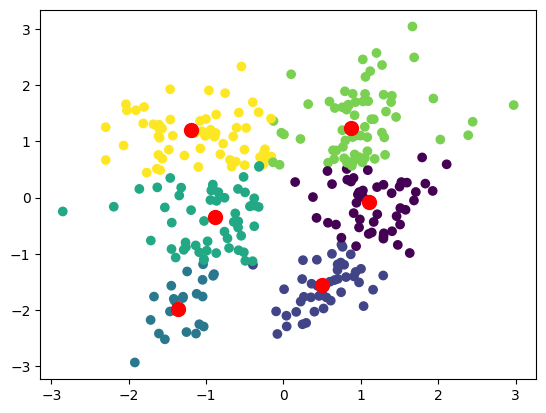

In [ ]:
clustering = AffinityPropagation(preference=gs.best_params_['preference'], damping=gs.best_params_['damping']).fit(data_1)

plt.scatter(data_1[:,0], data_1[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')

### Metrics

### external

In [ ]:
print(rand_score(clustering.labels_, data_y_1))
print(jaccard_score(clustering.labels_, data_y_1, average="micro"))

0.6470011148272018
0.07913669064748201


### internal

In [ ]:
print(silhouette_score(data_1, clustering.labels_))
print(davies_bouldin_score(data_1, clustering.labels_))

0.40439778201344434
0.7828476668953591


## 2

In [ ]:
gs = GridSearchCV(AffinityPropagation(), params, cv=3, scoring='rand_score')
gs.fit(data_2)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/

GridSearchCV(cv=3, estimator=AffinityPropagation(),
             param_grid={'damping': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'preference': array([-30.        , -27.89473684, -25.78947368, -23.68421053,
       -21.57894737, -19.47368421, -17.36842105, -15.26315789,
       -13.15789474, -11.05263158,  -8.94736842,  -6.84210526,
        -4.73684211,  -2.63157895,  -0.52631579,   1.57894737,
         3.68421053,   5.78947368,   7.89473684,  10.        ])},
             scoring='rand_score')

In [ ]:
gs.best_params_

{'damping': 0.5, 'preference': -30.0}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


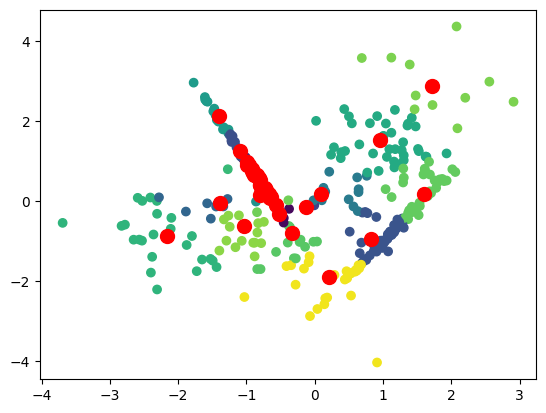

In [ ]:
clustering = AffinityPropagation(preference=gs.best_params_['preference'], damping=gs.best_params_['damping']).fit(data_2)

plt.scatter(data_2[:,0], data_2[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')

### Metrics

### external

In [ ]:
print(rand_score(clustering.labels_, data_y_2))
print(jaccard_score(clustering.labels_, data_y_2, average="micro"))

0.5606058125255833
0.0028653295128939827


### internal

In [ ]:
print(silhouette_score(data_2, clustering.labels_))
print(davies_bouldin_score(data_2, clustering.labels_))

0.2811376434178826
0.6499498062107004


## 3

In [ ]:
gs = GridSearchCV(AffinityPropagation(), params, cv=3, scoring='rand_score')
gs.fit(data_3)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/skle

GridSearchCV(cv=3, estimator=AffinityPropagation(),
             param_grid={'damping': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'preference': array([-30.        , -27.89473684, -25.78947368, -23.68421053,
       -21.57894737, -19.47368421, -17.36842105, -15.26315789,
       -13.15789474, -11.05263158,  -8.94736842,  -6.84210526,
        -4.73684211,  -2.63157895,  -0.52631579,   1.57894737,
         3.68421053,   5.78947368,   7.89473684,  10.        ])},
             scoring='rand_score')

In [ ]:
gs.best_params_

{'damping': 0.5, 'preference': -30.0}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


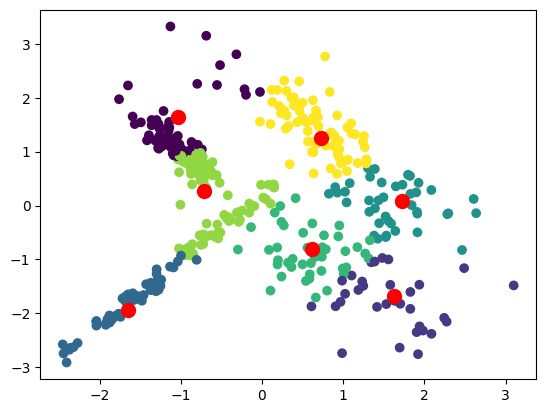

In [ ]:
clustering = AffinityPropagation(preference=gs.best_params_['preference'], damping=gs.best_params_['damping']).fit(data_3)

plt.scatter(data_3[:,0], data_3[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')

### Metrics

### external

In [ ]:
print(rand_score(clustering.labels_, data_y_3))
print(jaccard_score(clustering.labels_, data_y_3, average="micro"))

0.6320300751879699
0.12201963534361851


### internal

In [ ]:
print(silhouette_score(data_3, clustering.labels_))
print(davies_bouldin_score(data_3, clustering.labels_))

0.41640315722080135
0.7460041782859393


## DBSCAN

In [ ]:
params = {"eps": np.linspace(0.1, 0.5, 5), "min_samples": range(3, 10)}
gs = GridSearchCV(DBSCAN(), params, cv=3, scoring='rand_score')
gs.fit(data_1)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/

GridSearchCV(cv=3, estimator=DBSCAN(),
             param_grid={'eps': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples': range(3, 10)},
             scoring='rand_score')

In [ ]:
gs.best_params_

{'eps': 0.1, 'min_samples': 3}

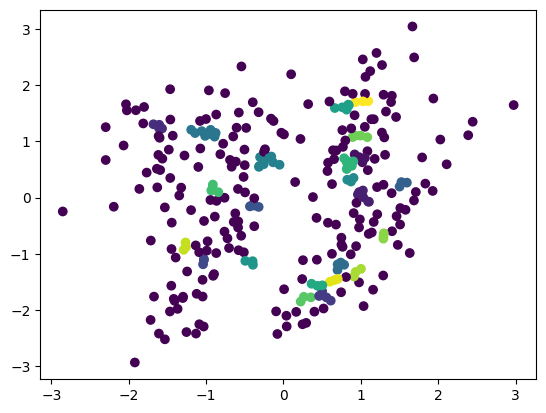

In [ ]:
dbscan = DBSCAN(eps=gs.best_params_["eps"], min_samples=gs.best_params_["min_samples"]).fit(data_1)
plt.scatter(data_1[:,0], data_1[:,1], c=dbscan.labels_)

### Metrics

### external

In [ ]:
print(rand_score(dbscan.labels_, data_y_1))
print(jaccard_score(dbscan.labels_, data_y_1, average="micro"))

0.5079375696767001
0.010101010101010102


### internal

In [ ]:
print(silhouette_score(data_1, dbscan.labels_))
print(davies_bouldin_score(data_1, dbscan.labels_))

-0.32389512066591086
1.5663343297898369


## 2

In [ ]:
gs = GridSearchCV(DBSCAN(), params, cv=3, scoring='rand_score')
gs.fit(data_2)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/

GridSearchCV(cv=3, estimator=DBSCAN(),
             param_grid={'eps': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples': range(3, 10)},
             scoring='rand_score')

In [ ]:
gs.best_params_

{'eps': 0.1, 'min_samples': 3}

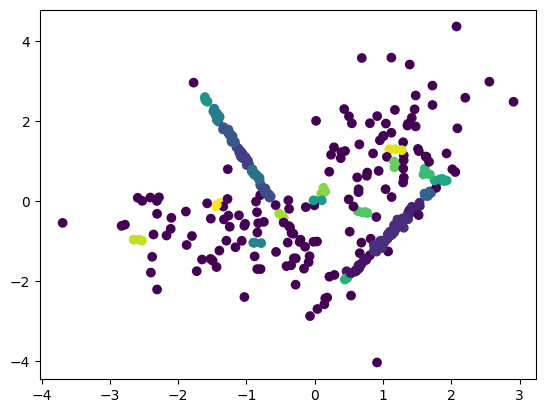

In [ ]:
dbscan = DBSCAN(eps=gs.best_params_["eps"], min_samples=gs.best_params_["min_samples"]).fit(data_2)
plt.scatter(data_2[:,0], data_2[:,1], c=dbscan.labels_)

### Metrics

### external

In [ ]:
print(rand_score(dbscan.labels_, data_y_2))
print(jaccard_score(dbscan.labels_, data_y_2, average="micro"))

0.5262054850593533
0.015965166908563134


### internal

In [ ]:
print(silhouette_score(data_2, dbscan.labels_))
print(davies_bouldin_score(data_2, dbscan.labels_))

0.000630761541478699
3.5108539826943255


## 3

In [ ]:
gs = GridSearchCV(DBSCAN(), params, cv=3, scoring='rand_score')
gs.fit(data_3)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/

GridSearchCV(cv=3, estimator=DBSCAN(),
             param_grid={'eps': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples': range(3, 10)},
             scoring='rand_score')

In [ ]:
gs.best_params_

{'eps': 0.1, 'min_samples': 3}

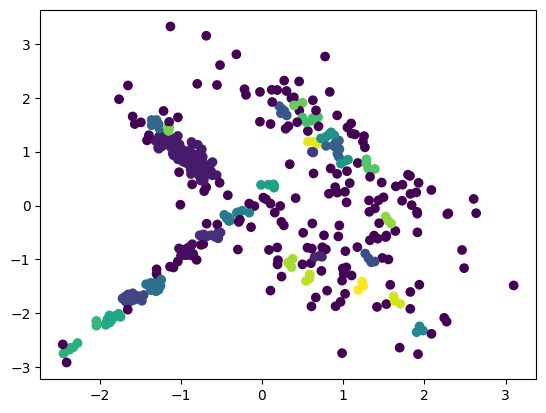

In [ ]:
dbscan = DBSCAN(eps=gs.best_params_["eps"], min_samples=gs.best_params_["min_samples"]).fit(data_3)
plt.scatter(data_3[:,0], data_3[:,1], c=dbscan.labels_)

### Metrics

### external

In [ ]:
print(rand_score(dbscan.labels_, data_y_3))
print(jaccard_score(dbscan.labels_, data_y_3, average="micro"))

0.6093609022556391
0.015228426395939087


### internal

In [ ]:
print(silhouette_score(data_3, dbscan.labels_))
print(davies_bouldin_score(data_3, dbscan.labels_))

-0.06508122506305625
1.2385372202480742


## GaussianMixture, EM

## 1

In [ ]:
parameters = {"n_components" : range(2, 10)}
gs = GridSearchCV(GaussianMixture(), parameters, cv=3)
gs.fit(data_1)

GridSearchCV(cv=3, estimator=GaussianMixture(),
             param_grid={'n_components': range(2, 10)})

In [ ]:
gs.best_params_

{'n_components': 4}

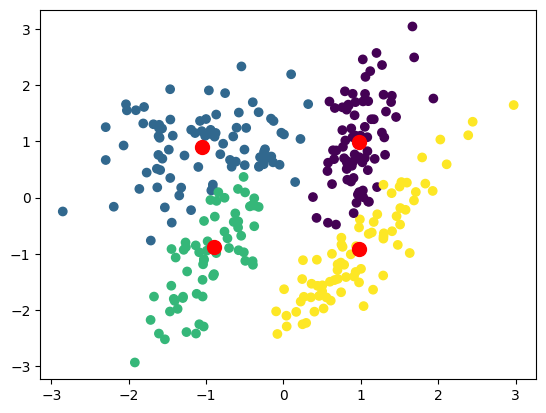

In [ ]:
gm = GaussianMixture(n_components=gs.best_params_['n_components']).fit(data_1)

plt.scatter(data_1[:,0], data_1[:,1], c=gm.predict(data_1))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

### Metrics

### external

In [ ]:
print(rand_score(gm.predict(data_1), data_y_1))
print(jaccard_score(gm.predict(data_1), data_y_1, average="micro"))

0.7418283166109253
0.005025125628140704


### internal

In [ ]:
print(silhouette_score(data_1, gm.predict(data_1)))
print(davies_bouldin_score(data_1, gm.predict(data_1)))

0.36171784745320984
0.8488639555358617


## 2

In [ ]:
gs = GridSearchCV(GaussianMixture(), parameters, cv=3)
gs.fit(data_2)

GridSearchCV(cv=3, estimator=GaussianMixture(),
             param_grid={'n_components': range(2, 10)})

In [ ]:
gs.best_params_

{'n_components': 4}

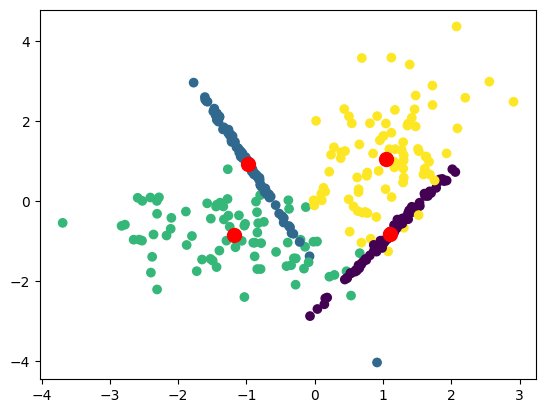

In [ ]:
gm = GaussianMixture(n_components=gs.best_params_['n_components']).fit(data_2)

plt.scatter(data_2[:,0], data_2[:,1], c=gm.predict(data_2))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

### Metrics

### external

In [ ]:
print(rand_score(gm.predict(data_2), data_y_2))
print(jaccard_score(gm.predict(data_2), data_y_2, average="micro"))

0.722865329512894
0.0028653295128939827


### internal

In [ ]:
print(silhouette_score(data_2, gm.predict(data_2)))
print(davies_bouldin_score(data_2, gm.predict(data_2)))

0.31386526533759623
0.9888367461129299


## 3

In [ ]:
gs = GridSearchCV(GaussianMixture(), parameters, cv=3)
gs.fit(data_2)

GridSearchCV(cv=3, estimator=GaussianMixture(),
             param_grid={'n_components': range(2, 10)})

In [ ]:
gs.best_params_

{'n_components': 4}

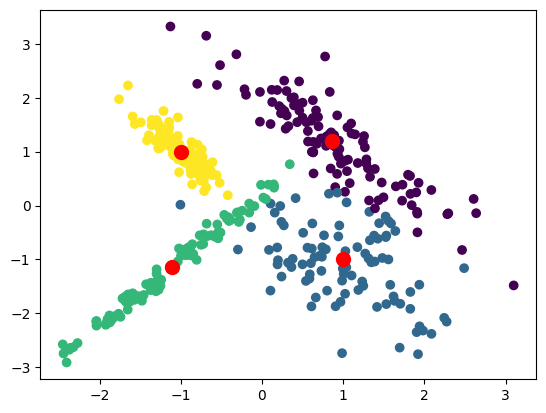

In [ ]:
gm = GaussianMixture(n_components=gs.best_params_['n_components']).fit(data_3)

plt.scatter(data_3[:,0], data_3[:,1], c=gm.predict(data_3))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

### Metrics

### external

In [ ]:
print(rand_score(gm.predict(data_3), data_y_3))
print(jaccard_score(gm.predict(data_3), data_y_3, average="micro"))

0.735375939849624
0.12994350282485875


### internal

In [ ]:
print(silhouette_score(data_3, gm.predict(data_3)))
print(davies_bouldin_score(data_3, gm.predict(data_3)))

0.4447452191048153
0.7853645465538168


## Иерархическая кластеризация

## 1

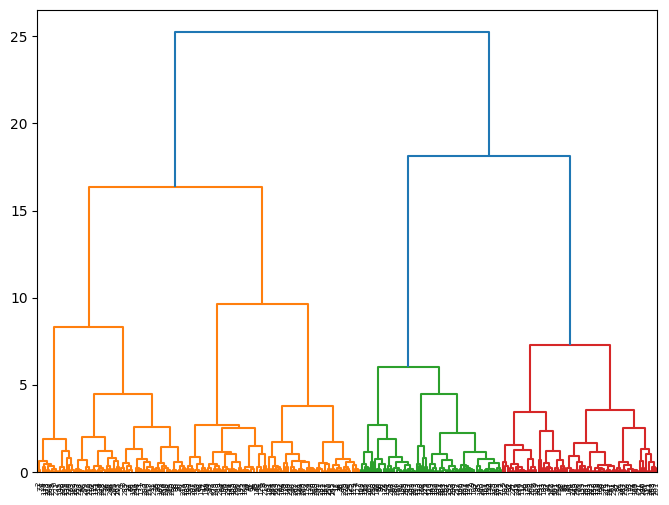

In [ ]:
clusters = hierarchy.linkage(data_1, method="ward")
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

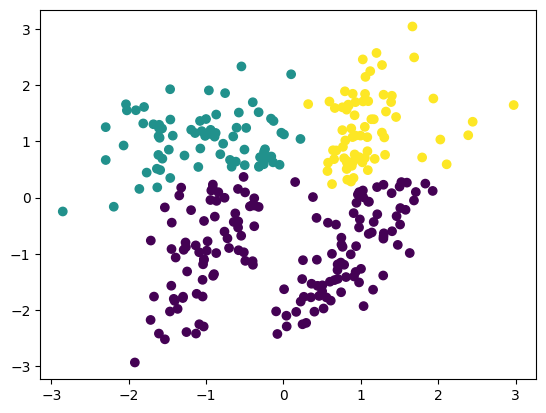

In [ ]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data_1)
plt.scatter(data_1[:,0], data_1[:,1], c=clustering.labels_)

### Metrics

### external

In [ ]:
print(rand_score(clustering.labels_, data_y_1))
print(jaccard_score(clustering.labels_, data_y_1, average="micro"))

0.6030992196209588
0.14068441064638784


### internal

In [ ]:
print(silhouette_score(data_1, clustering.labels_))
print(davies_bouldin_score(data_1, clustering.labels_))

0.35324745976680644
0.8543823923202821


## 2

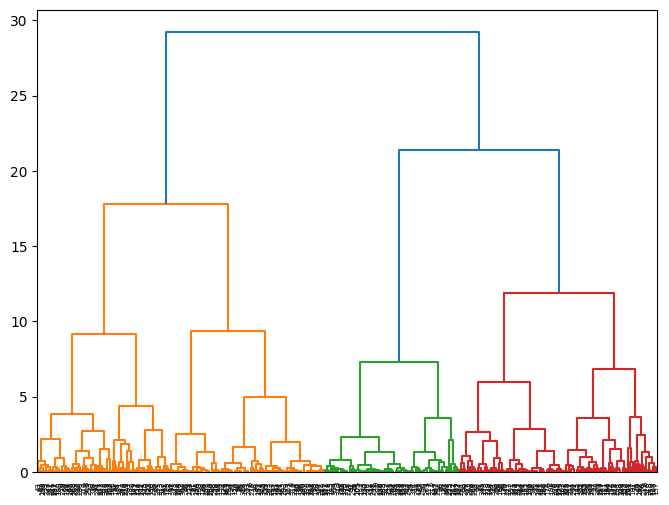

In [ ]:
clusters = hierarchy.linkage(data_2, method="ward")
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

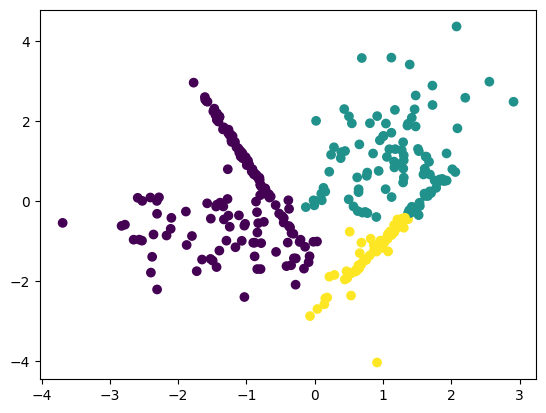

In [ ]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data_2)
plt.scatter(data_2[:,0], data_2[:,1], c=clustering.labels_)

### Metrics

### external

In [ ]:
print(rand_score(clustering.labels_, data_y_2))
print(jaccard_score(clustering.labels_, data_y_2, average="micro"))

0.8223659435120754
0.6241299303944315


### internal

In [ ]:
print(silhouette_score(data_2, clustering.labels_))
print(davies_bouldin_score(data_2, clustering.labels_))

0.368029456586589
0.8462145735963595


## 3

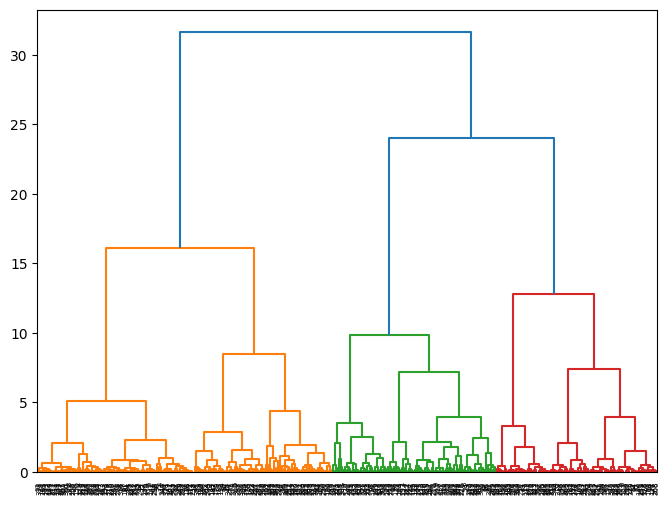

In [ ]:
clusters = hierarchy.linkage(data_3, method="ward")
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

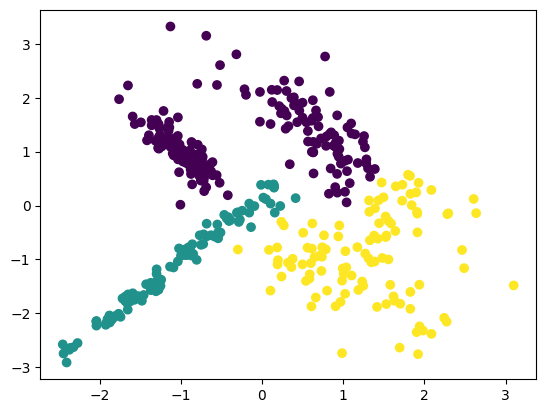

In [ ]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data_3)
plt.scatter(data_3[:,0], data_3[:,1], c=clustering.labels_)

### Metrics

### external

In [ ]:
print(rand_score(clustering.labels_, data_y_3))
print(jaccard_score(clustering.labels_, data_y_3, average="micro"))

0.6204511278195489
0.1544011544011544


### internal

In [ ]:
print(silhouette_score(data_3, clustering.labels_))
print(davies_bouldin_score(data_3, clustering.labels_))

0.4353232453603816
0.8077108941172955


## Карты Кохонена

## 1

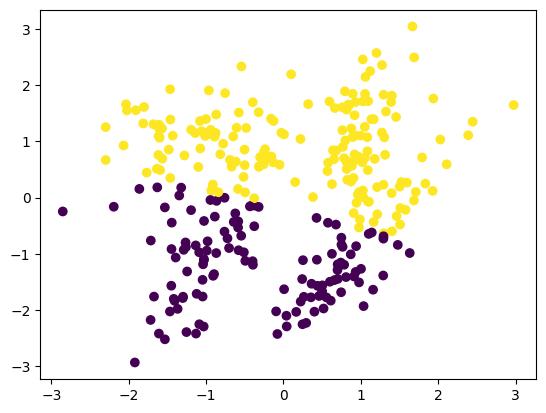

In [ ]:
som = SOM(m=2, n=1, dim=2)
som.fit(data_1)
predictions = som.predict(data_1)
plt.scatter(data_1[:,0], data_1[:,1], c=predictions)

### Metrics

### external

In [ ]:
print(rand_score(predictions, data_y_1))
print(jaccard_score(predictions, data_y_1, average="micro"))

0.5026978818283167
0.3761467889908257


### internal

In [ ]:
print(silhouette_score(data_1, predictions))
print(davies_bouldin_score(data_1, predictions))

0.36835139220326935
1.0904583540038328


## 2

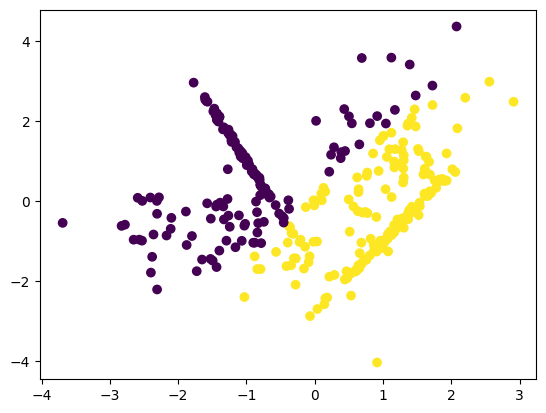

In [ ]:
som = SOM(m=2, n=1, dim=2)
som.fit(data_2)
predictions = som.predict(data_2)
plt.scatter(data_2[:,0], data_2[:,1], c=predictions)

### Metrics

### external

In [ ]:
print(rand_score(predictions, data_y_2))
print(jaccard_score(predictions, data_y_2, average="micro"))

0.7188866148178469
0.7114914425427873


### internal

In [ ]:
print(silhouette_score(data_2, predictions))
print(davies_bouldin_score(data_2, predictions))

0.37116221982588454
1.1486754523802367


## 3

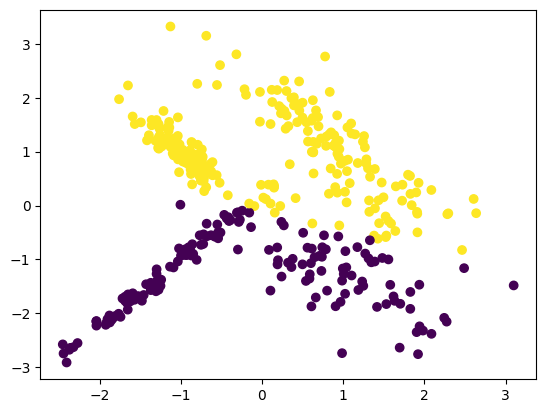

In [ ]:
som = SOM(m=2, n=1, dim=2)
som.fit(data_3)
predictions = som.predict(data_3)
plt.scatter(data_3[:,0], data_3[:,1], c=predictions)

### Metrics

### external

In [ ]:
print(rand_score(predictions, data_y_3))
print(jaccard_score(predictions, data_y_3, average="micro"))

0.5032706766917293
0.3769363166953528


### internal

In [ ]:
print(silhouette_score(data_3, predictions))
print(davies_bouldin_score(data_3, predictions))

0.38753218747825163
1.118182044481081
